In [200]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

#Execute all the "Jupyter notebook Non prints"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #'all' / 'last'

In [201]:
#Load the data
rated_bookings_file = './Datasets/rated_bookings_with_location.csv'
rb=pd.read_csv(rated_bookings_file)

#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])

#Load the bookings
bookings_file = './Datasets/all_bookings3.0.csv'
book=pd.read_csv(bookings_file)

book['pickup_date'] = pd.to_datetime(book['pickup_date'])
book['last_update_date'] = pd.to_datetime(book['last_update_date'])
book['booking_date'] = pd.to_datetime(book['booking_date'])



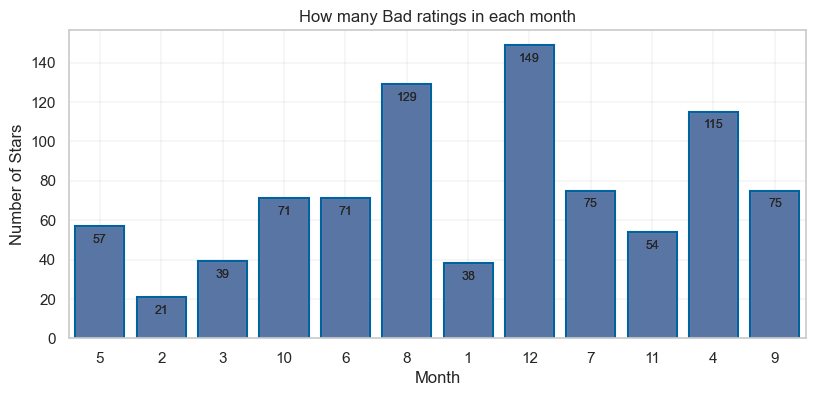

In [202]:
#Let's filter the dataset by ratings <=2
rb[rb['rating_score']<=2].shape

#DATA
#group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year,rb['pickup_date'].dt.month])
group = rb[rb['rating_score']<=2].groupby(rb['pickup_date'].dt.month)
g1=group.agg({'rating_score':['count', 'mean']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['mean'], ascending=False)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
g1.columns=['month', 'count', 'mean']
g1

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

#filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g1, x='month',y='count',  fill=True, order=g1['month'])

#ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='month',y='count',  fill=False, order=g1['month'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)

#ax.set_xticks(g1['pickup_date']-1, labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic'])#<-- This is improveable :( but for some reason it is not working intuitively.
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(4.5, 4.8, .05))
#ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('How many Bad ratings in each month')

ax.set(xlabel='Month', ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


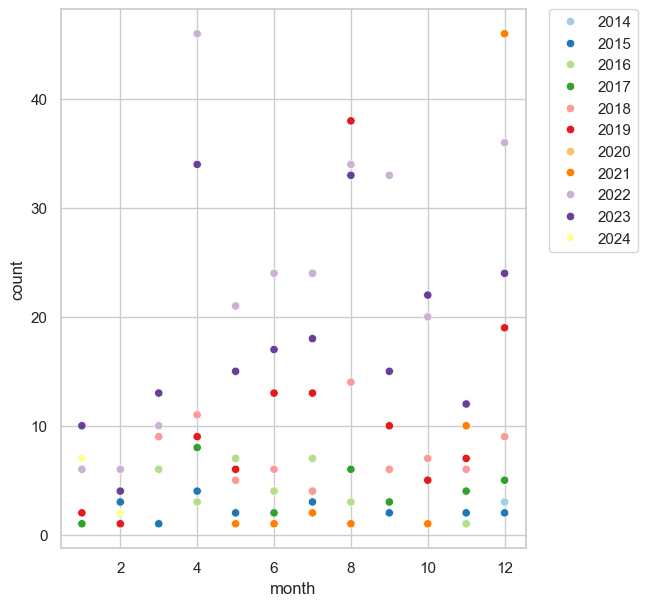

In [203]:
#We are showing that months with more work have more complaints... but we are not showing the proportion.
#We are going to make a line and a hue for year

group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count', 'mean']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

#VISUALIZATION
width = 6
height = 7
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
sns.scatterplot(data=g1, x='month',y='count',hue='year', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

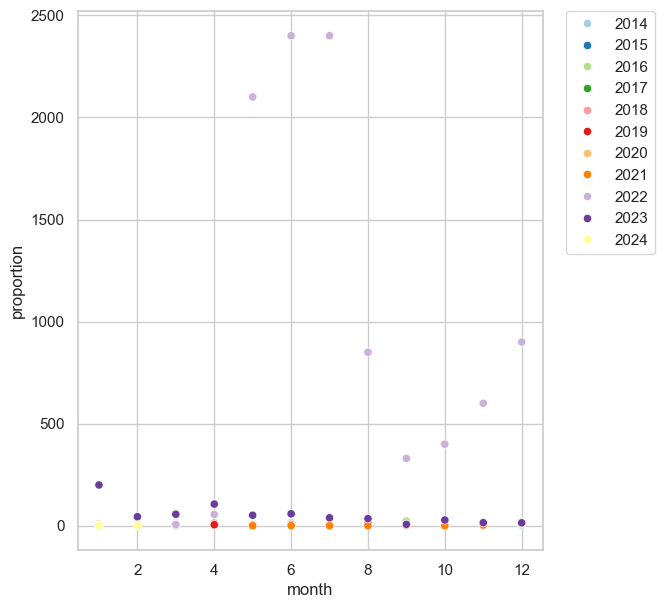

In [204]:
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[rb['rating_score']<=2].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
#g1

group = rb.groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g2=group.agg({'rating_score':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2=g2.reset_index()
#g2

g1['proportion']=(g1['count']/g2['count'])*100
#g1

#VISUALIZATION
width = 6
height = 7
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
sns.scatterplot(data=g1, x='month',y='proportion',hue='year', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_20014/749039642.py:34: UserWarning: The palette list has more values (11) than needed (9), which may not be intended.
  ax=sns.lineplot(data=g3, x='month',y='proportion',hue='year', palette=sns.color_palette("Paired", n_colors=11))


[[<matplotlib.axis.YTick at 0x137f89190>,

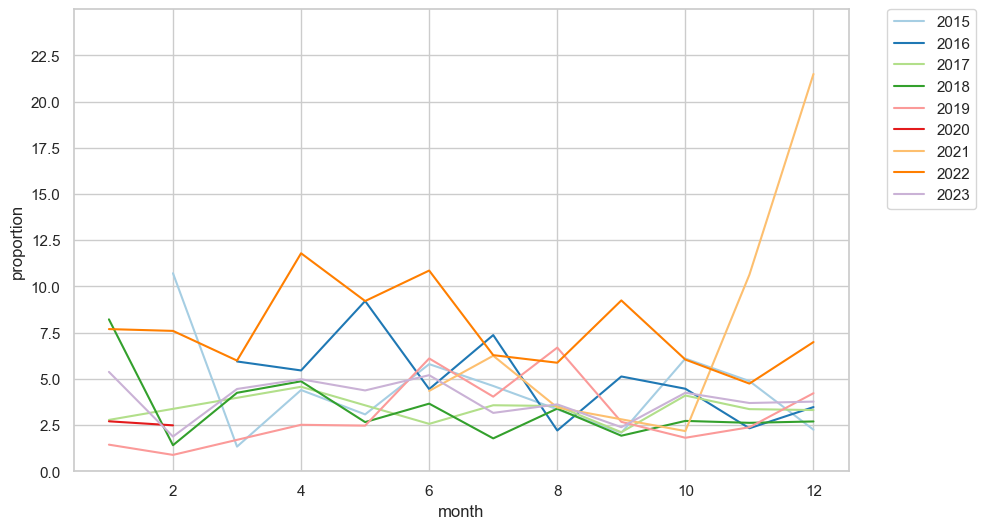

In [205]:
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)&(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = rb[(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g2=group.agg({'rating_score':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2

g1['proportion']=(g1['count_g1']/g2['count_g2'])*100  #<-------- CAREFUL !!! WRONG!! SO WRONG
g1.drop(columns='proportion', axis=1,inplace=True)

g3=pd.merge(g1, g2, how='inner', left_on=['year','month'], right_on=['year','month'] )
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

g3=g3[g3['count_g2']>10]

#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.lineplot(data=g3, x='month',y='proportion',hue='year', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=25)
ax.set(yticks=np.arange(0, 25, 2.5))
#ax.set_xlim(xmin=-1.5,xmax=12.5)




/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_20014/434797458.py:35: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=g3, x='vehicle_category',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11))


'\nThere are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.\n'

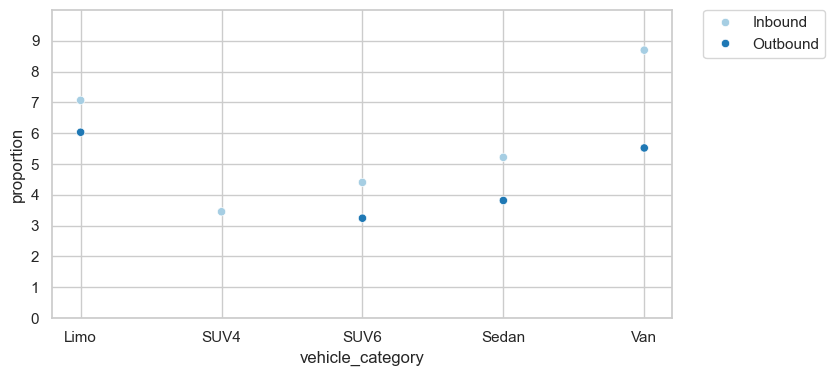

In [206]:
#By Vehicle
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)&(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['vehicle_category'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = rb[(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['vehicle_category'],rb['in_or_outbound']])
g2=group.agg({'rating_score':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2

g1['proportion']=(g1['count_g1']/g2['count_g2'])*100  #<-------- CAREFUL !!! WRONG!! SO WRONG
g1.drop(columns='proportion', axis=1,inplace=True)

g3=pd.merge(g1, g2, how='inner', left_on=['vehicle_category','in_or_outbound'], right_on=['vehicle_category','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

#g3=g3[g3['count_g2']>10]

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='vehicle_category',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=10)
ax.set(yticks=np.arange(0, 10, 1))
#ax.set_xlim(xmin=-1.5,xmax=12.5)

'''
There are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.
'''


/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_20014/3384617485.py:35: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11))


,day_in_advance_groups,in_or_outbound,count_g2
0,G01_12 hour,Inbound,64
1,G01_12 hour,Outbound,29
2,G02_24 hour,Inbound,449
3,G02_24 hour,Outbound,365
4,G03_48 hour,Inbound,892
5,G03_48 hour,Outbound,382
6,G04_4 day,Inbound,1145
7,G04_4 day,Outbound,271
8,G05_1 week,Inbound,1311
9,G05_1 week,Outbound,525


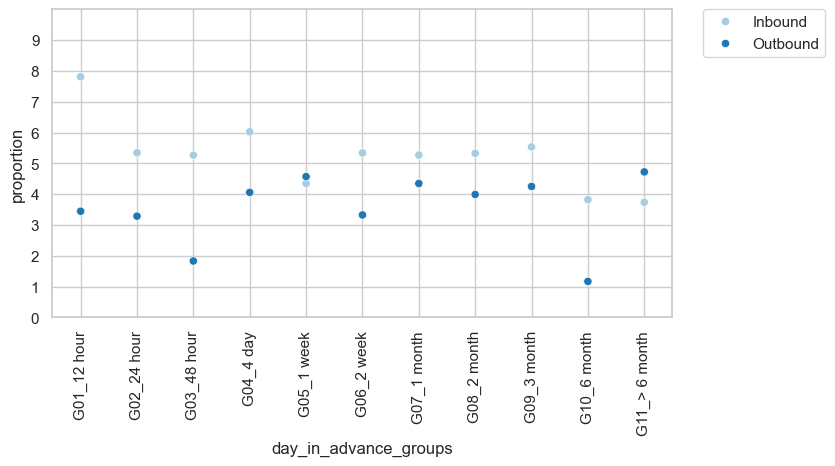

In [207]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100

group = rb[(rb['rating_score']<=2)&(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['day_in_advance_groups'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = rb[(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['day_in_advance_groups'],rb['in_or_outbound']])
g2=group.agg({'rating_score':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2

g1['proportion']=(g1['count_g1']/g2['count_g2'])*100  #<-------- CAREFUL !!! WRONG!! SO WRONG
g1.drop(columns='proportion', axis=1,inplace=True)

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','in_or_outbound'], right_on=['day_in_advance_groups','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

#g3=g3[g3['count_g2']>10]

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=10)
ax.set(yticks=np.arange(0, 10, 1))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)
'''
There are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.
'''
g2

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_20014/1761288570.py:36: UserWarning: The palette list has more values (11) than needed (2), which may not be intended.
  ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', style='vehicle_category', palette=sns.color_palette("Paired", n_colors=11))


'\nThere are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.\n'

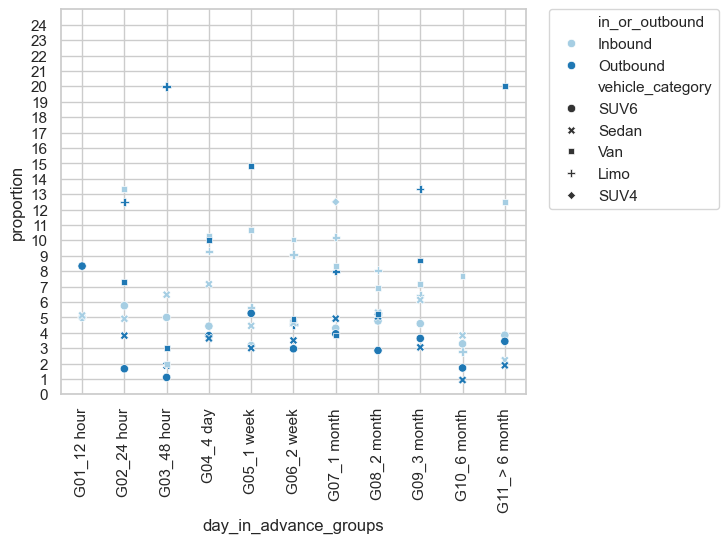

In [208]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100


group = rb[(rb['rating_score']<=2)&(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['day_in_advance_groups'],rb['vehicle_category'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = rb[(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['day_in_advance_groups'],rb['vehicle_category'],rb['in_or_outbound']])
g2=group.agg({'rating_score':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2

g1['proportion']=(g1['count_g1']/g2['count_g2'])*100  #<-------- CAREFUL !!! WRONG!! SO WRONG
g1.drop(columns='proportion', axis=1,inplace=True)

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','vehicle_category','in_or_outbound'], right_on=['day_in_advance_groups','vehicle_category','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

#g3=g3[g3['count_g2']>10]

#VISUALIZATION
width = 6
height = 5
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='in_or_outbound', style='vehicle_category', palette=sns.color_palette("Paired", n_colors=11))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=25)
ax.set(yticks=np.arange(0, 25, 1))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)
'''
There are no bad reviews for SUV4 Outbound. That is why there is no datapoint in the plot.
'''

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'G01_12 hour'),
  Text(1, 0, 'G02_24 hour'),
  Text(2, 0, 'G03_48 hour'),
  Text(3, 0, 'G04_4 day'),
  Text(4, 0, 'G05_1 week'),
  Text(5, 0, 'G06_2 week'),
  Text(6, 0, 'G07_1 month'),
  Text(7, 0, 'G08_2 month'),
  Text(8, 0, 'G09_3 month'),
  Text(9, 0, 'G10_6 month'),
  Text(10, 0, 'G11_> 6 month')])

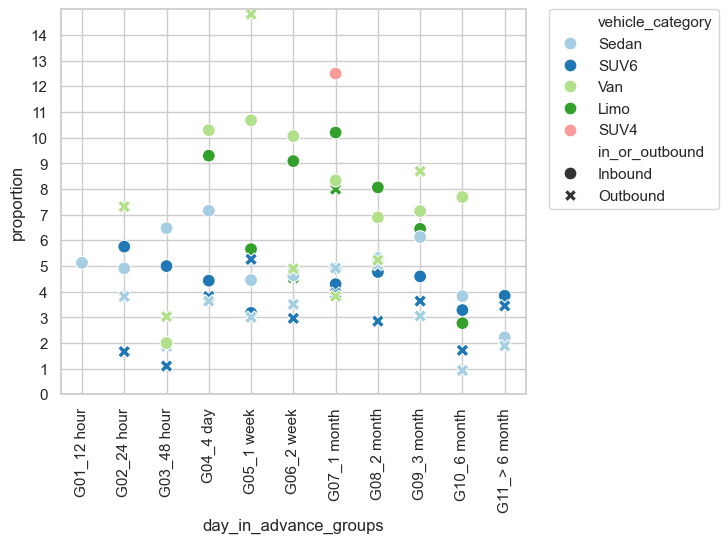

In [209]:
#By Days in Advance
#I want to put this in perspective with PROPORTION
# (Count BAD reviews / ALL review) *100


group = rb[(rb['rating_score']<=2)&(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['day_in_advance_groups'],rb['vehicle_category'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count']})
#g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1.columns=['count_g1']
g1=g1.reset_index()
#g1

group = rb[(rb['pickup_date'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))].groupby([rb['day_in_advance_groups'],rb['vehicle_category'],rb['in_or_outbound']])
g2=group.agg({'rating_score':['count']})
#g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2.columns=['count_g2']
g2=g2.reset_index()
#g2

g1['proportion']=(g1['count_g1']/g2['count_g2'])*100  #<-------- CAREFUL !!! WRONG!! SO WRONG
g1.drop(columns='proportion', axis=1,inplace=True)

g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','vehicle_category','in_or_outbound'], right_on=['day_in_advance_groups','vehicle_category','in_or_outbound'])
g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

g3=g3[g3['count_g2']>20]

#VISUALIZATION
width = 6
height = 5
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='day_in_advance_groups',y='proportion', hue='vehicle_category', style='in_or_outbound', palette=sns.color_palette("Paired", n_colors=5), s=85)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_ylim(ymin=0 ,ymax=15)
ax.set(yticks=np.arange(0, 15, 1))
#ax.set_xlim(xmin=-1.5,xmax=12.5)
plt.xticks(rotation=90)

'''Because SUV4 started being available since October 27th 2023 and customers
and most bookings have taken place on the busiest times, SUV4 lack quiet time
to compensate a bit like the other can.
Also the nature of SUV4 is esentially the same as Sedan and SUV 6 so no different
results should be expected.
'''

(array([  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
         91,  98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175,
        182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266,
        273, 280, 287, 294, 301, 308, 315, 322, 329, 336, 343, 350, 357]),
 [Text(0, 0, '0'),
  Text(7, 0, '7'),
  Text(14, 0, '14'),
  Text(21, 0, '21'),
  Text(28, 0, '28'),
  Text(35, 0, '35'),
  Text(42, 0, '42'),
  Text(49, 0, '49'),
  Text(56, 0, '56'),
  Text(63, 0, '63'),
  Text(70, 0, '70'),
  Text(77, 0, '77'),
  Text(84, 0, '84'),
  Text(91, 0, '91'),
  Text(98, 0, '98'),
  Text(105, 0, '105'),
  Text(112, 0, '112'),
  Text(119, 0, '119'),
  Text(126, 0, '126'),
  Text(133, 0, '133'),
  Text(140, 0, '140'),
  Text(147, 0, '147'),
  Text(154, 0, '154'),
  Text(161, 0, '161'),
  Text(168, 0, '168'),
  Text(175, 0, '175'),
  Text(182, 0, '182'),
  Text(189, 0, '189'),
  Text(196, 0, '196'),
  Text(203, 0, '203'),
  Text(210, 0, '210'),
  Text(217, 0, '217'),
  Te

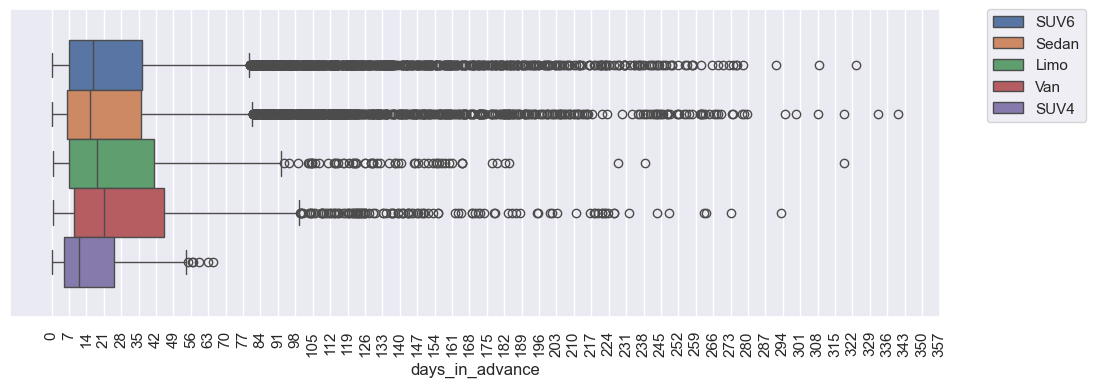

In [210]:
#NEXT BOXPLOT DAYS_IN_ADVANCE BY VEHICLE

#VISUALIZATION
width = 12
height = 4

sns.set(rc = {'figure.figsize':(width, height)})
ax=sns.boxplot(data=rb,x='days_in_advance', hue='vehicle_category')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
ax.set(xticks=np.arange(0, 360, 7))
#ax.set_xlim(xmin=-1.5,xmax=100)
plt.xticks(rotation=90)

(-1.5, 100.0)

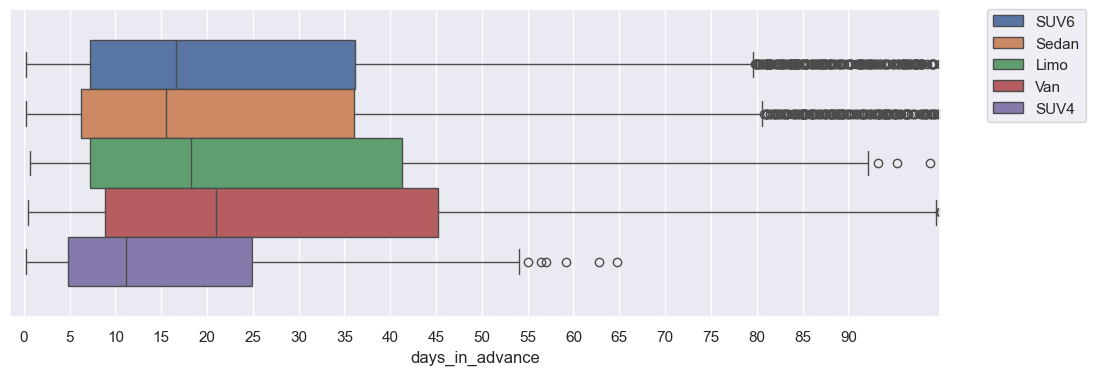

In [211]:
#NEXT BOXPLOT DAYS_IN_ADVANCE BY VEHICLE

#VISUALIZATION
width = 12
height = 4

sns.set(rc = {'figure.figsize':(width, height)})
ax=sns.boxplot(data=rb,x='days_in_advance', hue='vehicle_category')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.set_ylim(ymin=0 ,ymax=10)
#ax.set(yticks=np.arange(0, 360, 5))
ax.set(xticks=np.arange(0, 95, 5))
ax.set_xlim(xmin=-1.5,xmax=100)

In [212]:
g=rb[rb['vehicle_category']=='SUV4']
g.sort_values(by='booking_date', ascending=True).describe()

,pickup_date,number_of_passenger,total_price,total_comission,total_driver,last_update_date,booking_date,rating_score,rating_date,days_in_advance
count,207,207.000000,207.000000,207.0,207.000000,207,207,207.000000,207,207.000000
mean,2023-12-21 11:53:54.782608640,3.521739,128.884058,12.5,89.734300,2023-12-20 19:13:01.739130624,2023-12-05 15:28:31.594203136,4.787440,2023-12-22 16:52:41.159420416,15.850963
min,2023-10-28 18:00:00,2.000000,113.000000,12.5,75.000000,2023-10-28 09:45:00,2023-10-27 10:03:00,1.000000,2023-10-29 00:03:00,0.297917
25%,2023-12-06 14:32:30,3.000000,120.000000,12.5,85.000000,2023-12-05 14:37:30,2023-11-18 11:02:00,5.000000,2023-12-07 11:44:30,4.882292
50%,2023-12-23 17:00:00,4.000000,130.000000,12.5,90.000000,2023-12-22 18:00:00,2023-12-02 11:58:00,5.000000,2023-12-24 02:43:00,11.191667
75%,2024-01-04 14:15:00,4.000000,130.000000,12.5,90.000000,2024-01-03 14:15:00,2023-12-22 07:27:30,5.000000,2024-01-05 01:41:30,24.916319
max,2024-02-04 15:05:00,4.000000,182.000000,12.5,130.000000,2024-02-05 09:23:00,2024-02-03 03:22:00,5.000000,2024-02-05 08:46:00,64.798611
std,NaN,0.695520,11.252447,0.0,8.232185,NaN,NaN,0.663352,NaN,14.856208


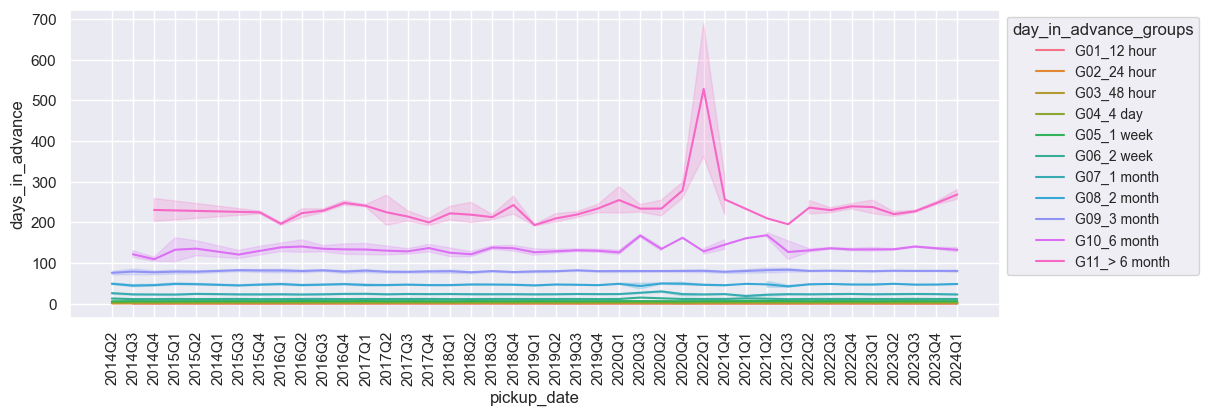

In [233]:
book.dtypes
dd=book[['pickup_date','days_in_advance','day_in_advance_groups']]
dd=dd[dd['pickup_date']<'2024-02-01']
dd['pickup_date']=dd['pickup_date'].dt.to_period('Q').astype(str)
dd['day_in_advance_groups']=dd['day_in_advance_groups'].astype('category')
ax=sns.lineplot(data=dd, x=dd['pickup_date'] ,y='days_in_advance', hue='day_in_advance_groups')
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


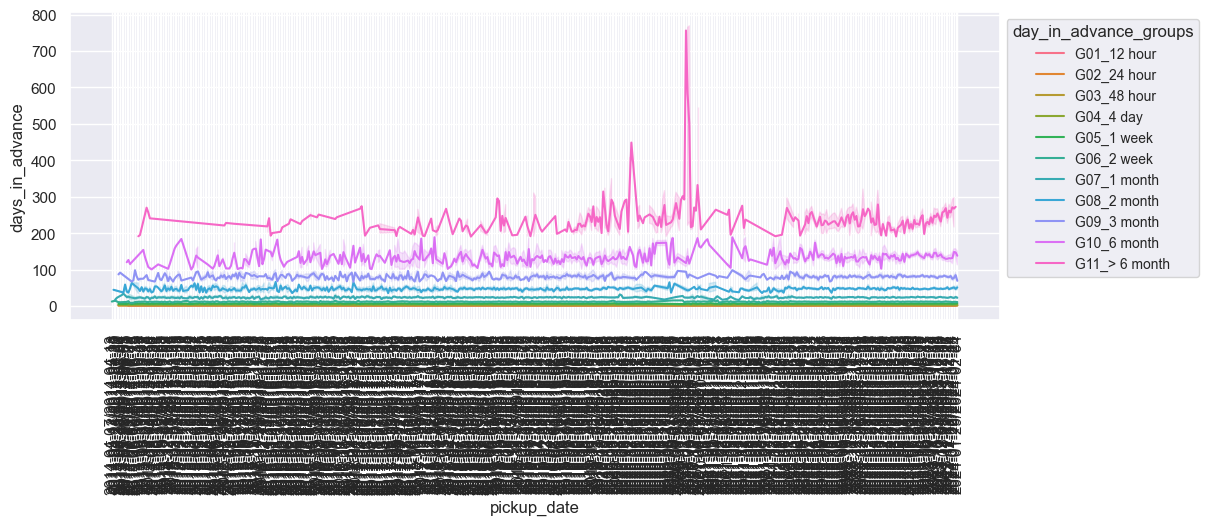

In [234]:
book.dtypes
dd=book[['pickup_date','days_in_advance','day_in_advance_groups']]
dd=dd[dd['pickup_date']<'2024-02-01']
dd['pickup_date']=dd['pickup_date'].dt.to_period('W').astype(str)
dd['day_in_advance_groups']=dd['day_in_advance_groups'].astype('category')
ax=sns.lineplot(data=dd, x=dd['pickup_date'] ,y='days_in_advance', hue='day_in_advance_groups')
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


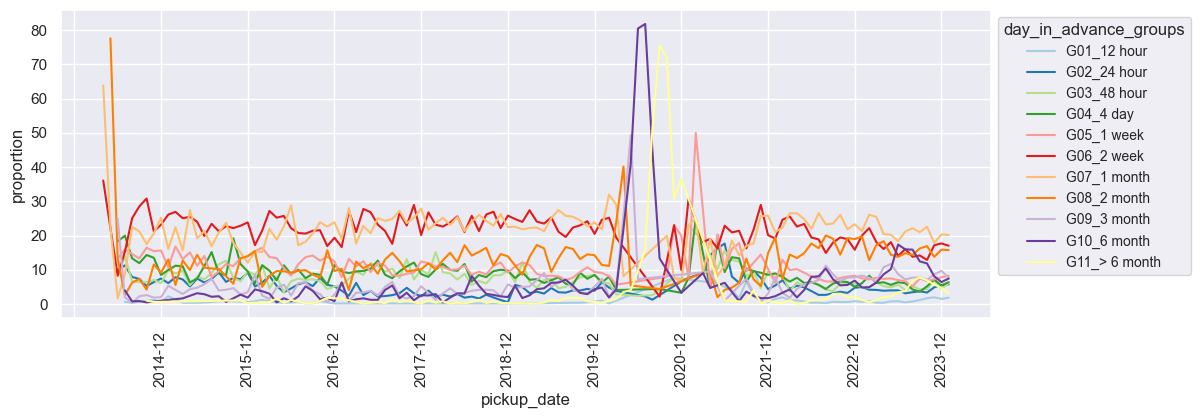

In [260]:
book.dtypes
dd=book[['pickup_date','day_in_advance_groups', 'booking_id']]
dd=dd[dd['pickup_date']<'2024-02-01']
dd['pickup_date']=dd['pickup_date'].dt.to_period('M').astype(str)
dd['booking_id']=1

dd_total=book[['pickup_date','booking_id']]
dd_total=dd_total[dd_total['pickup_date']<'2024-02-01']
dd_total['pickup_date']=dd_total['pickup_date'].dt.to_period('M').astype(str)
dd_total['booking_id']=1

d1=dd.groupby(['pickup_date', 'day_in_advance_groups'])
d1gru=d1.agg({'booking_id':['count']})
d1gru.columns=['count_dd']
d1gru.reset_index(inplace=True)
d1gru

d2=dd_total.groupby(['pickup_date'])
d2gru=d2.agg({'booking_id':['count']})
d2gru.columns=['count_total']
d2gru.reset_index(inplace=True)
d2gru


gdata=pd.merge(d1gru,d2gru, how='left', left_on='pickup_date', right_on='pickup_date')
gdata['proportion']=gdata['count_dd']/gdata['count_total']*100
gdata['day_in_advance_groups']=gdata['day_in_advance_groups'].astype('category')
ax=sns.lineplot(data=gdata, x='pickup_date' ,y='proportion', hue='day_in_advance_groups', palette=sns.color_palette("Paired", n_colors=11))

#ax.set(yticks=np.arange(0, 360, 5))
ax.set(xticks=np.arange(-4, 124, 12))

plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


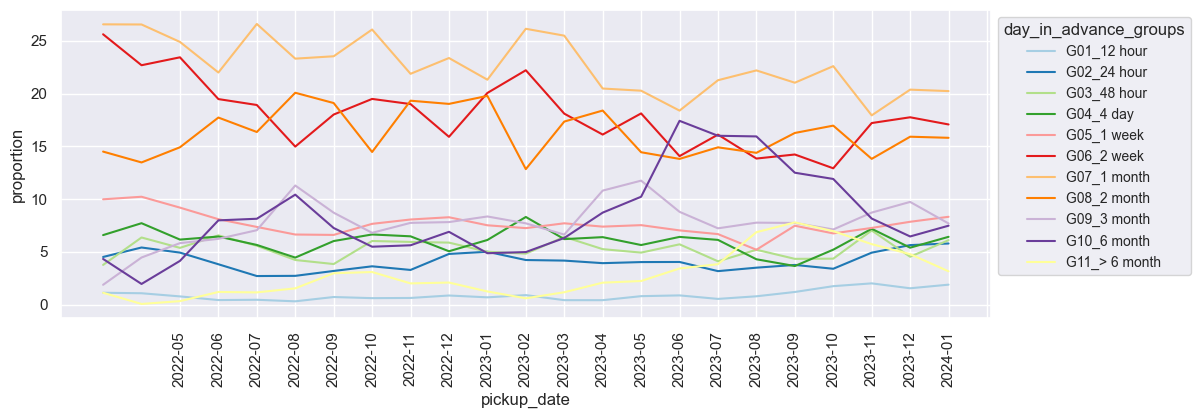

In [268]:
book.dtypes
dd=book[['pickup_date','day_in_advance_groups', 'booking_id']]
dd=dd[(dd['pickup_date']>'2022-03-01')&(dd['pickup_date']<'2024-02-01')]
dd['pickup_date']=dd['pickup_date'].dt.to_period('M').astype(str)
dd['booking_id']=1

dd_total=book[['pickup_date','booking_id']]
dd_total=dd_total[(dd_total['pickup_date']>'2022-03-01')&(dd_total['pickup_date']<'2024-02-01')]
dd_total['pickup_date']=dd_total['pickup_date'].dt.to_period('M').astype(str)
dd_total['booking_id']=1

d1=dd.groupby(['pickup_date', 'day_in_advance_groups'])
d1gru=d1.agg({'booking_id':['count']})
d1gru.columns=['count_dd']
d1gru.reset_index(inplace=True)
d1gru

d2=dd_total.groupby(['pickup_date'])
d2gru=d2.agg({'booking_id':['count']})
d2gru.columns=['count_total']
d2gru.reset_index(inplace=True)
d2gru


gdata=pd.merge(d1gru,d2gru, how='left', left_on='pickup_date', right_on='pickup_date')
gdata['proportion']=gdata['count_dd']/gdata['count_total']*100
gdata['day_in_advance_groups']=gdata['day_in_advance_groups'].astype('category')
ax=sns.lineplot(data=gdata, x='pickup_date' ,y='proportion', hue='day_in_advance_groups', palette=sns.color_palette("Paired", n_colors=11))

ax.set(yticks=np.arange(0, 30, 5))
ax.set(xticks=np.arange(2, 24, 1))

plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


'''
There are some interesting things going on here with the duration that might require further study.
I see the 1 month and 2 month lines have complementary behavior. When one goes up the other goes down.

The six month grows towards a 6 month big date and then goes down and the smaller ones pickup.

Last minute reservations go up when there are a lot of people. blue

'''